Imports

In [107]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import getpass

from sentinelhub import (
    SHConfig,
    DataCollection,
    SentinelHubCatalog,
    SentinelHubRequest,
    SentinelHubStatistical,
    BBox,
    bbox_to_dimensions,
    CRS,
    MimeType,
    Geometry,
)

import os
from dotenv import load_dotenv

load_dotenv()

True

Il faut se créer des OAuth sur https://shapps.dataspace.copernicus.eu/dashboard/#/ -> User settings -> en dessous de "OAuth clients" -> "Create" puis mettre un nom et copier ça dans un .env :

`SENTINEL_HUB_CLIENT_ID="esqfqesfqesffe-esffesqfes-fesqqefsqfes"`

`SENTINEL_HUB_CLIENT_SECRET="sjibiqb"`

In [108]:
config = SHConfig()
config.sh_client_id = os.getenv("SENTINEL_HUB_CLIENT_ID") or getpass.getpass("Enter your Sentinel Hub client ID: ")
config.sh_client_secret = os.getenv("SENTINEL_HUB_CLIENT_SECRET") or getpass.getpass("Enter your Sentinel Hub client secret: ")
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"

config.save("takeair")

Résolution en mètres par pixel des images

In [109]:
resolution = 10 

Si on veut faire une request sur une bbox définie (http://bboxfinder.com)

In [110]:
bbox_coords: list[float] = [7.678671,48.517827,7.747207,48.536443]
bbox = BBox(bbox=bbox_coords, crs=CRS.WGS84)

Requête

In [111]:
catalog = SentinelHubCatalog(config=config)

time_interval = "2025-05-05", "2025-05-05"

search_iterator = catalog.search(
    DataCollection.SENTINEL5P,
    bbox=bbox,
    time=time_interval,
    fields={"include": ["id", "properties.datetime"], "exclude": []},
)

results = list(search_iterator)
print("Total number of results:", len(results))

results

Total number of results: 9


[{'id': 'S5P_OFFL_L2__NO2____20250505T113341_20250505T131511_39173_03_020800_20250508T130156.nc',
  'properties': {'datetime': '2025-05-05T11:33:41Z'}},
 {'id': 'S5P_OFFL_L2__CLOUD__20250505T113341_20250505T131511_39173_03_020701_20250508T092921.nc',
  'properties': {'datetime': '2025-05-05T11:33:41Z'}},
 {'id': 'S5P_OFFL_L2__HCHO___20250505T113341_20250505T131511_39173_03_020701_20250508T130144.nc',
  'properties': {'datetime': '2025-05-05T11:33:41Z'}},
 {'id': 'S5P_OFFL_L2__SO2____20250505T113341_20250505T131511_39173_03_020701_20250508T191142.nc',
  'properties': {'datetime': '2025-05-05T11:33:41Z'}},
 {'id': 'S5P_OFFL_L2__CO_____20250505T113341_20250505T131511_39173_03_020800_20250508T070724.nc',
  'properties': {'datetime': '2025-05-05T11:33:41Z'}},
 {'id': 'S5P_OFFL_L2__CH4____20250505T113341_20250505T131511_39173_03_020800_20250508T130144.nc',
  'properties': {'datetime': '2025-05-05T11:33:41Z'}},
 {'id': 'S5P_OFFL_L2__AER_LH_20250505T113341_20250505T131511_39173_03_020800_20250

Visualisation de tous les satellites disponibles : 

In [112]:
from sentinelhub import DataCollection

satellites = {}
for collection in DataCollection:
    try:
        satellites[collection.name] = [band.name for band in collection.bands]
    except:
        satellites[collection.name] = []

for satellite, bands in satellites.items():
    print(f"\n{satellite}:")
    if bands:
        for band in bands:
            print(f"- {band}")
    else:
        print("No bands available")



SENTINEL2_L1C:
- B01
- B02
- B03
- B04
- B05
- B06
- B07
- B08
- B8A
- B09
- B10
- B11
- B12

SENTINEL2_L2A:
- B01
- B02
- B03
- B04
- B05
- B06
- B07
- B08
- B8A
- B09
- B11
- B12

SENTINEL1:
No bands available

SENTINEL1_IW:
- VV
- VH

SENTINEL1_IW_ASC:
- VV
- VH

SENTINEL1_IW_DES:
- VV
- VH

SENTINEL1_EW:
- HH
- HV

SENTINEL1_EW_ASC:
- HH
- HV

SENTINEL1_EW_DES:
- HH
- HV

SENTINEL1_EW_SH:
- HH

SENTINEL1_EW_SH_ASC:
- HH

SENTINEL1_EW_SH_DES:
- HH

DEM:
- DEM

DEM_MAPZEN:
- DEM

DEM_COPERNICUS_30:
- DEM

DEM_COPERNICUS_90:
- DEM

MODIS:
- B01
- B02
- B03
- B04
- B05
- B06
- B07

LANDSAT_MSS_L1:
- B01
- B02
- B03
- B04

LANDSAT_TM_L1:
- B01
- B02
- B03
- B04
- B05
- B06
- B07

LANDSAT_TM_L2:
- B01
- B02
- B03
- B04
- B05
- B06
- B07

LANDSAT_ETM_L1:
- B01
- B02
- B03
- B04
- B05
- B06_VCID_1
- B06_VCID_2
- B07
- B08

LANDSAT_ETM_L2:
- B01
- B02
- B03
- B04
- B05
- B06
- B07

LANDSAT_OT_L1:
- B01
- B02
- B03
- B04
- B05
- B06
- B07
- B08
- B09
- B10
- B11

LANDSAT_OT_L2:
- B01
- B02


Simple affichage de tous les satellites disponibles :

In [113]:
for satellite in satellites:
    print(f"{satellite}")

SENTINEL2_L1C
SENTINEL2_L2A
SENTINEL1
SENTINEL1_IW
SENTINEL1_IW_ASC
SENTINEL1_IW_DES
SENTINEL1_EW
SENTINEL1_EW_ASC
SENTINEL1_EW_DES
SENTINEL1_EW_SH
SENTINEL1_EW_SH_ASC
SENTINEL1_EW_SH_DES
DEM
DEM_MAPZEN
DEM_COPERNICUS_30
DEM_COPERNICUS_90
MODIS
LANDSAT_MSS_L1
LANDSAT_TM_L1
LANDSAT_TM_L2
LANDSAT_ETM_L1
LANDSAT_ETM_L2
LANDSAT_OT_L1
LANDSAT_OT_L2
SENTINEL5P
SENTINEL3_OLCI
SENTINEL3_SLSTR
HARMONIZED_LANDSAT_SENTINEL
s2l2a
s5p


In [114]:
satellites['SENTINEL5P']

['CO',
 'HCHO',
 'NO2',
 'O3',
 'SO2',
 'CH4',
 'AER_AI_340_380',
 'AER_AI_354_388',
 'CLOUD_BASE_PRESSURE',
 'CLOUD_TOP_PRESSURE',
 'CLOUD_BASE_HEIGHT',
 'CLOUD_TOP_HEIGHT',
 'CLOUD_OPTICAL_THICKNESS',
 'CLOUD_FRACTION']

In [129]:
# This is script may only work with sentinelhub.__version__ >= '3.4.0'
from sentinelhub import SentinelHubRequest, DataCollection, MimeType, CRS, BBox, SHConfig, Geometry

# Credentials
config = SHConfig()
config.sh_client_id = os.getenv('SENTINEL_HUB_CLIENT_ID')
config.sh_client_secret = os.getenv('SENTINEL_HUB_CLIENT_SECRET')
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'

evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""
bbox = BBox(bbox=[12.44693, 41.870072, 12.541001, 41.917096], crs=CRS.WGS84)

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(name='s2l2a', service_url='https://sh.dataspace.copernicus.eu'),          
            time_interval=('2025-04-17', '2025-05-17'),          
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.JPG),
    ],
    bbox=bbox,
    size=[512, 343.697],
    config=config
)

response = request.get_data()
response

[array([[[ 81,  89,  78],
         [ 83,  91,  80],
         [ 74,  84,  73],
         ...,
         [ 69,  73,  58],
         [ 76,  77,  61],
         [103, 101,  86]],
 
        [[ 90,  96,  86],
         [ 80,  88,  77],
         [ 73,  81,  70],
         ...,
         [ 65,  68,  51],
         [ 74,  72,  57],
         [104, 101,  86]],
 
        [[107, 110, 101],
         [ 97, 103,  93],
         [ 86,  92,  82],
         ...,
         [ 57,  58,  42],
         [ 71,  68,  53],
         [106, 100,  84]],
 
        ...,
 
        [[138, 131, 121],
         [137, 130, 120],
         [120, 113, 103],
         ...,
         [139, 135, 124],
         [134, 130, 119],
         [119, 115, 104]],
 
        [[139, 132, 122],
         [142, 135, 125],
         [122, 115, 105],
         ...,
         [138, 134, 123],
         [136, 132, 121],
         [119, 115, 104]],
 
        [[161, 155, 143],
         [148, 142, 130],
         [139, 131, 120],
         ...,
         [134, 128, 116],
  

Pour faire une request : 
On va sur le browser, on récupère le masque qu'on veut avec la function setup(), puis on la met dans le request builder et on récupère la request finale sentinelhub

In [150]:
# This is script may only work with sentinelhub.__version__ >= '3.4.0'
from sentinelhub import SentinelHubRequest, DataCollection, MimeType, CRS, BBox, SHConfig, Geometry

# Credentials
config = SHConfig()
config.sh_client_id = os.getenv('SENTINEL_HUB_CLIENT_ID')
config.sh_client_secret = os.getenv('SENTINEL_HUB_CLIENT_SECRET')
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'

evalscript = """
//VERSION=3
var minVal = 0.0;
var maxVal = 0.0001;

function setup() {
  return {
    input: ["NO2", "dataMask"],
    output: [
      {
        id: "default",
      	bands: 4,
      },
      {
        id: "index",
        bands: 1,
        sampleType: "FLOAT32" 
      },
      {
        id: "eobrowserStats",
        bands: 1,
      },
      {
        id: "dataMask",
        bands: 1
      },
    ],
  };
}

var viz = ColorRampVisualizer.createBlueRed(minVal, maxVal);

function evaluatePixel(samples) {
  const [r, g, b] = viz.process(samples.NO2);
  
  const statsVal = isFinite(samples.NO2) ? samples.NO2 : NaN;
  return {
    default: [r, g, b, samples.dataMask],
    index: [samples.NO2],
    eobrowserStats: [statsVal],
    dataMask: [samples.dataMask],
  };
}
"""
bbox = BBox(bbox=[-1072.268367, 48.516604, -1072.254541, 48.526041], crs=CRS.WGS84)

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL5P.define_from(name='s5p', service_url='https://sh.dataspace.copernicus.eu'),         
            time_interval=('2025-05-01', '2025-05-10'),          
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.JPG),
    ],
    bbox=bbox,
    size=[512, 527.576],
    config=config
)

response = request.get_data()

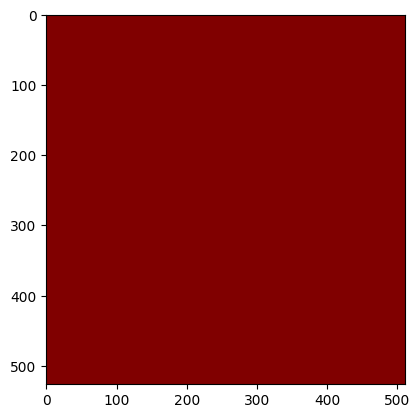

In [151]:
response
plt.imshow(response[0])
plt.show()

In [152]:
import numpy as np
# Check if all pixels in the response have the same values
response_array = response[0]
first_pixel = response_array[0,0]
is_uniform = np.all(response_array == first_pixel)
print(f"All pixels are identical: {is_uniform}")
if is_uniform:
    print(f"Uniform value across image: {first_pixel}")


All pixels are identical: True
Uniform value across image: [128   0   0]


In [153]:
# This is script may only work with sentinelhub.__version__ >= '3.4.0'
from sentinelhub import SentinelHubRequest, DataCollection, MimeType, CRS, BBox, SHConfig, Geometry

# Credentials
config = SHConfig()
config.sh_client_id = os.getenv('SENTINEL_HUB_CLIENT_ID')
config.sh_client_secret = os.getenv('SENTINEL_HUB_CLIENT_SECRET')
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'

evalscript = """
//VERSION=3
var minVal = -1.0;
var maxVal = 5.0;

function setup() {
  return {
    input: ["AER_AI_340_380", "dataMask"],
    output: [
      {
        id: "default",
          bands: 4,
      },
      {
        id: "index",
        bands: 1,
        sampleType: "FLOAT32" 
      },
      {
        id: "eobrowserStats",
        bands: 1,
      },
      {
        id: "dataMask",
        bands: 1
      },
    ],
  };
}

var viz = ColorRampVisualizer.createBlueRed(minVal, maxVal);

function evaluatePixel(samples) {
  const [r, g, b] = viz.process(samples.AER_AI_340_380);

  const statsVal = isFinite(samples.AER_AI_340_380) ? samples.AER_AI_340_380 : NaN;
  return {
    default: [r, g, b, samples.dataMask],
    index: [samples.AER_AI_340_380],
    eobrowserStats: [statsVal],
    dataMask: [samples.dataMask],
  };
}
"""
bbox = BBox(bbox=[-1086.865941, 38.891033, -1056.001383, 52.643063], crs=CRS.WGS84)

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL5P.define_from(name='s5p', service_url='https://sh.dataspace.copernicus.eu'),     
            time_interval=('2025-05-01', '2025-05-10'),          
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.JPG),
    ],
    bbox=bbox,
    size=[512, 294.52],
    config=config
)

response = request.get_data()


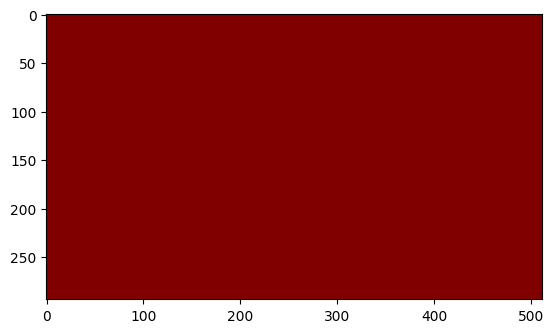

In [154]:
response

# display the image
plt.imshow(response[0])
plt.show()

In [161]:
evalscript_ndvi = """
//VERSION=3
function setup() {
  return {
    input: [{
      bands: [
        "B04",
        "B08",
        "dataMask"
      ]
    }],
    output: {
      bands: 4
    }
  }
}
  

function evaluatePixel(sample) {
    let val = (sample.B08 - sample.B04) / (sample.B08 + sample.B04);
    let imgVals = null;
    
    if (val<-1.1) imgVals = [0,0,0];
    else if (val<-0.2) imgVals = [0.75,0.75,0.75];
    else if (val<-0.1) imgVals = [0.86,0.86,0.86];
    else if (val<0) imgVals = [1,1,0.88];
    else if (val<0.025) imgVals = [1,0.98,0.8];
    else if (val<0.05) imgVals = [0.93,0.91,0.71];
    else if (val<0.075) imgVals = [0.87,0.85,0.61];
    else if (val<0.1) imgVals = [0.8,0.78,0.51];
    else if (val<0.125) imgVals = [0.74,0.72,0.42];
    else if (val<0.15) imgVals = [0.69,0.76,0.38];
    else if (val<0.175) imgVals = [0.64,0.8,0.35];
    else if (val<0.2) imgVals = [0.57,0.75,0.32];
    else if (val<0.25) imgVals = [0.5,0.7,0.28];
    else if (val<0.3) imgVals = [0.44,0.64,0.25];
    else if (val<0.35) imgVals = [0.38,0.59,0.21];
    else if (val<0.4) imgVals = [0.31,0.54,0.18];
    else if (val<0.45) imgVals = [0.25,0.49,0.14];
    else if (val<0.5) imgVals = [0.19,0.43,0.11];
    else if (val<0.55) imgVals = [0.13,0.38,0.07];
    else if (val<0.6) imgVals = [0.06,0.33,0.04];
    else imgVals = [0,0.27,0];
    
    
    imgVals.push(sample.dataMask)
    
    return imgVals
}
"""

request_ndvi_img = SentinelHubRequest(
    evalscript=evalscript_ndvi,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(
                name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
            ),
            time_interval=("2022-05-01", "2022-05-20"),
            other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=(2500,2500),
    config=config,
)